# Conduction Through a Composite Wall

In this test case, the thermal conduction through a wall made of multiple materials is analyzed.



---

Reference: [FIFTY2 Technology](https://www.fifty2.eu/innovation/conduction-through-a-composite-wall/)

## Setup

The composite wall intended here is composed of one or more layers of material with different conductivities. An example can be seen in Figure 1. The geometry of a wall is interesting here because when it is assumed that the whole sides of the wall are heated uniformly, the temperature changes only in the direction normal to the wall. At steady-state, the analytical temperature profile depends only on the wall depth $x$, and the heat flux at each location along the wall is constant due to the conservation of energy. Thus, having different thermal conductivities for each layer leads to different temperature gradients for each of them. An example of the resulting temperature distribution through the wall can be seen in red in Figure 1. Because the analytical solutions are for steady-state, the transient simulation is run until there are no more changes in the temperature field.

<figure>
  <img src="https://www.fifty2.eu/wp-content/uploads/2022/04/generic-setup-1004x884.png">
  <figcaption align = "center"> <i>Figure 1: Heat conduction in a composite wall. The red line is an example of temperature distribution.</i></figcaption>
</figure>

At steady-state, the heat flux in the wall reads:

\begin{align}
  Q = -\frac{k_1 A}{x_1} \left(T_2 – T_1 \right) = -\frac{k_2 A}{x_2} \left(T_3 – T_2 \right) = -\frac{k_3 A}{x_3} \left(T_4 – T_3 \right) \hspace{1.5cm}(1)
\end{align}

After rearranging:

\begin{align}
  Q = \frac{(T_1 – T_4)}{\left[ \frac{x_1}{k_1 A} + \frac{x_2}{k_2 A} + \frac{x_3}{k_3 A}\right]}\hspace{1.5cm}(2)
\end{align}

Where:

$Q$: heat flux

$T_1$ to $T_4$: temperatures at the interfaces of the layers.

$x_1$ to $x_3$: thicknesses of each layer of the wall

$k_1$ to $k_3$: thermal conductivity of each layer

$A$: surface area at the boundaries.



The user can set either heat flux or temperature boundary conditions on the boundaries of the wall.

## Code

In [38]:
class CompositeWall():

  def __init__(self, wall_layers, temp_in, temp_out):
    self.wall_layers = wall_layers
    self.temp_in = temp_in
    self.temp_out = temp_out

  def TotalHeatFlux(self):
    total_thermal_resistance = sum( wall_layer.ThermalResistance() for wall_layer in self.wall_layers)
    return ((self.temp_in - self.temp_out)/total_thermal_resistance)

  def InterfaceTemperature(self):
    temp_list = [self.temp_in]
    for wall_layer in self.wall_layers:
      temp_i = (temp_list[-1] - (self.TotalHeatFlux()*wall_layer.ThermalResistance()))
      temp_list.append(temp_i)
    return temp_list

  def plot_temperature_distribution(self):
    x = [ i.x for i in self.wall_layers]
    X = [sum(x[:i+1]) for i in range(len(x))]
    y = self.InterfaceTemperature()
    plt.figure()
    plt.plot(([0]+X), y)
    plt.xlabel("lenght [m]")
    plt.ylabel("temperature [degC]")
    plt.title("Temperature Distribution along the centerline of the wall")
    plt.show();

class WallLayer():

  def __init__(self, thickness, thermal_conductivity, surface_area):
    self.x = thickness
    self.k = thermal_conductivity
    self.A = surface_area

  def ThermalResistance(self):
    return (self.x/(self.k * self.A))


## Cases

Various cases are considered from the easiest to the more complex. For all cases the surface area $A$ will be taken as 1$m^2$ (the domain is a cube of size 1$m$). The percentage given after a result is the relative error.

### Case 1-1 Layer

The most simple configuration is one layer made of one material as shown in Figure 2.

<figure>
  <img src="https://www.fifty2.eu/wp-content/uploads/2022/04/case1-setup.new_.png">
  <figcaption align = "center"><i>Figure 2: Setup for case 1.</i></figcaption>
</figure>

Using equation 1, the heat flux can be estimated for this configuration with:

\begin{align}
  Q = -\frac{k_1 A}{x_1} \left(T_2 – T_1 \right)\hspace{1.5cm}(3)
\end{align}

where:

* $k_1$ = $1$ W.m$^{-1}$K $^{-1}$
* $x_1$ = $1$m
* $T_1$ = 10 $\deg(C)$
* $T_2$ = 0 $\deg(C)$

The theoretical heat flux is $Q$ = 10
W/m$^2$ and the temperature distribution along the centerline of the wall, $x$ reads:

\begin{align}
T \left(x \right) = T_1 – \frac{Q}{k_1 A}x\hspace{1.5cm}(4)
\end{align}

### Case 2 – 2 Layers 1 Material

Another layer of the same material can now be added. The setup is presented in Figure 4. The total width of the wall has been maintained at $1$m; each solver takes half of it at $0.5$m.

<figure>
  <img src="https://www.fifty2.eu/wp-content/uploads/2022/04/case2-setup.new_.png">
  <figcaption align = "center"> <i>Figure 4: Setup for case 2.</i></figcaption>
</figure>

In this case, the uniform heat flux is:

\begin{align}
Q = \frac{(T_1 – T_3)}{\left[ \frac{x_1}{k_1 A} + \frac{x_2}{k_2 A}\right]} \hspace{1.5cm}(5)
\end{align}

In [40]:
cw1 = CompositeWall(wall_layers=[
    WallLayer(thickness=1, thermal_conductivity=1, surface_area=1)
], temp_in=10, temp_out=0)

cw2 = CompositeWall(wall_layers=[
    WallLayer(thickness=0.5, thermal_conductivity=1, surface_area=1),
    WallLayer(thickness=0.5, thermal_conductivity=1, surface_area=1)
], temp_in=10, temp_out=0)

cw3 = CompositeWall(wall_layers=[
    WallLayer(thickness=0.5, thermal_conductivity=1, surface_area=1),
    WallLayer(thickness=0.5, thermal_conductivity=10, surface_area=1)
], temp_in=10, temp_out=0)


cw1.TotalHeatFlux(), cw2.TotalHeatFlux(), cw3.TotalHeatFlux()

(10.0, 10.0, 18.18181818181818)

In [41]:
cw1.InterfaceTemperature(), cw2.InterfaceTemperature(),

([10, 0.0], [10, 5.0, 0.0])

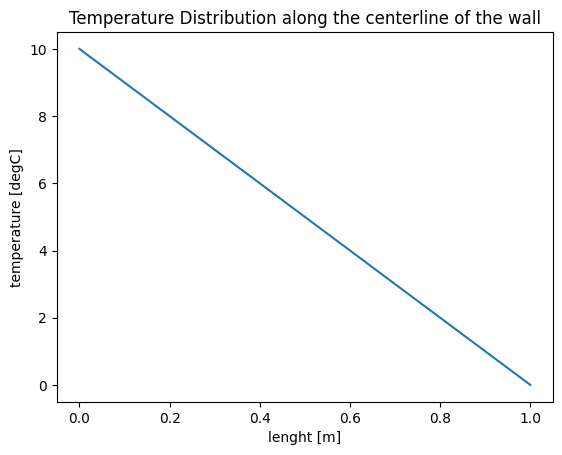

In [42]:
cw1.plot_temperature_distribution()

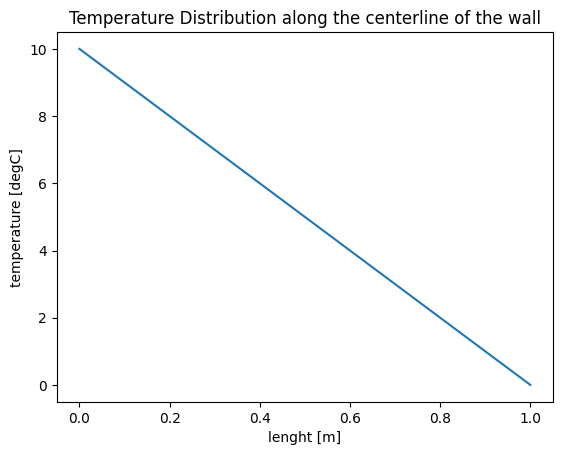

In [43]:
cw2.plot_temperature_distribution()

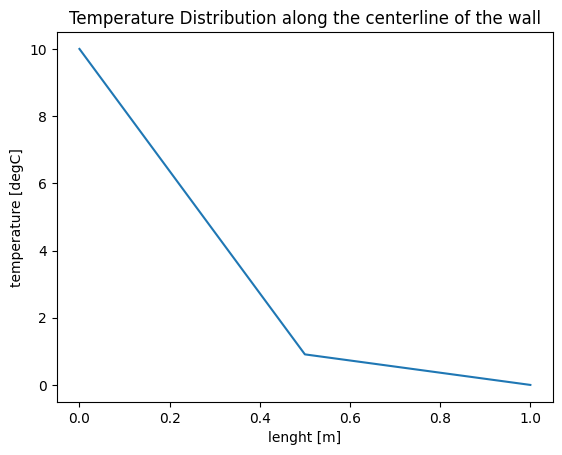

In [44]:
cw3.plot_temperature_distribution()